# scRNA-seq analysis of human whole embyros of PCW3-5

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import os
import time

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)

import rpy2.rinterface_lib.callbacks
import logging

import rpy2
from rpy2.robjects import pandas2ri
import anndata2ri

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

In [2]:
# week_files = '/newdata/maqiang/Cortex/ACNaggr10/outs/filtered_feature_bc_matrix'
week_files = ['/newdatb/lzy/human_whole_brain/alignment/agg_3W-1/HE-6_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19/',
              '/newdatb/lzy/human_whole_brain/alignment/agg_4W-1/4W-1_aggr_out/outs/filtered_feature_bc_matrix/',
             '/newdatb/lzy/human_whole_brain/alignment/agg_4W-2/HE-9_5W_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_4W-3/HE-4-1_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_5W-1/HE-10_5W_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_5W-2/HE-12-4W_aggr_out/outs/filtered_feature_bc_matrix',
             '/newdatb/lzy/human_whole_brain/alignment/agg_5W-3/HE-5_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_6W-1/HE-11-6W_aggr_out/outs/filtered_feature_bc_matrix',
             '/newdatb/lzy/human_whole_brain/alignment/agg_7W-1/HE-7_7W_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_8W-1/HE-8_8W_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19',
             '/newdatb/lzy/human_whole_brain/alignment/agg_9W-1/outs/filtered_gene_bc_matrices_mex/hg19/',
             '/newdatb/lzy/human_whole_brain/alignment/agg_9W-2/HE-2_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19/',
             '/newdatb/lzy/human_whole_brain/alignment/agg_12W-1/HE-3_aggr_out/outs/filtered_gene_bc_matrices_mex/hg19/']
out_dir = '/newdatb/home/wanglab13/scratch/wholebrain/results'

In [3]:
def preprocess(week_file,out_dir):
    import os, sys
    adata = sc.read_10x_mtx(week_file,var_names='gene_symbols',cache=True)
    week_stage = week_file.split('/')[5].split('_')[1]
    result_file = os.path.join(out_dir,'h5ad','{}.h5ad'.format(week_stage))
    adata.write(result_file)
    return(adata)

In [4]:
week_stages = [wf.split('/')[5].split('_')[1] for wf in week_files]
adata_files = [os.path.join(out_dir,'h5ad','{}_nopreproc.h5ad'.format(week_stage)) for week_stage in week_stages]
start_time = time.time()
[adataw3_1,adataw4_1,adataw4_2,adataw4_3,adataw5_1,adata5_2,adata5_3,adataw6_1,adataw7_1,adataw8_1,adataw9_1,adataw9_2,adataw12_1] = [sc.read(adata_file) for adata_file in adata_files]
print("--- %s seconds ---" % (time.time() - start_time))

--- 13.794315576553345 seconds ---


In [5]:
## merge whole body data
adataw3_1.obs['week_stage']='W3-1'
adataw4_1.obs['week_stage']='W4-1'
adataw5_1.obs['week_stage']='W5-1'
adataw3_1_4_1 = adataw3_1.concatenate(adataw4_1)
adataw3_1_4_1_5_1 = adataw3_1_4_1.concatenate(adataw5_1)
adata = adataw3_1_4_1_5_1.copy()
del adataw3_1_4_1_5_1

filtered out 7 cells that have less than 200 genes expressed
filtered out 9023 genes that are detected in less than 10 cells


... storing 'week_stage' as categorical
... storing 'feature_types-1-0' as categorical
/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


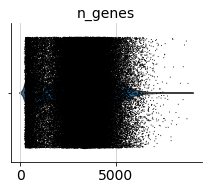

/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


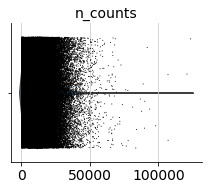

/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/datb/home/wanglab13/anaconda3/envs/r2/lib/python3.6/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


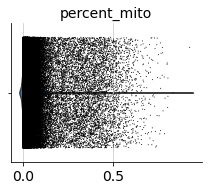

In [6]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=10)

mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pl.violin(adata, ['n_genes'],rotation=False,
             jitter=0.4, multi_panel=True)
sc.pl.violin(adata, ['n_counts'],
             jitter=0.4, multi_panel=True)
sc.pl.violin(adata, ['percent_mito'],
             jitter=0.4, multi_panel=True)

In [7]:
adata = adata[(adata.obs['n_genes'] > 800) & (adata.obs['n_genes'] < 6000), :]
adata = adata[adata.obs['percent_mito'] < 0.2, :]
adata.raw=adata.copy()
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

sc.pp.log1p(adata)

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

sc.tl.pca(adata, svd_solver='arpack',use_highly_variable=True)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:11.54)


In [8]:
pca = adata.obsm['X_pca']
timepoints = adata.obs['week_stage']

In [9]:
adata.obs['week_stage'].shape

(83827,)

In [10]:
%%R
# Load all the R libraries we will be using in the notebook
library(scran)
library(RColorBrewer)
# library(slingshot)
library(monocle)
library(gam)
library(clusterExperiment)
library(ggplot2)
library(plyr)
library(MAST)

R[write to console]: Loading required package: BiocParallel

R[write to console]: Loading required package: SingleCellExperiment

R[write to console]: Loading required package: SummarizedExperiment

R[write to console]: Loading required package: GenomicRanges

R[write to console]: Loading required package: stats4

R[write to console]: Loading required package: BiocGenerics

R[write to console]: Loading required package: parallel

R[write to console]: 
Attaching package: ‘BiocGenerics’


R[write to console]: The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


R[write to console]: The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


R[write to console]: The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colMeans


Error: package ‘VGAM’ required by ‘monocle’ could not be found


In [11]:
%%R -i pca -i timepoints
require(scran)
require(irlba)
require(BiocParallel)
str(timepoints)
str(pca)

R[write to console]: Loading required package: irlba



 Factor w/ 3 levels "W3-1","W4-1",..: 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "names")= chr [1:83827] "AAACCTGAGAATGTTG-1-0-0" "AAACCTGAGCCAGAAC-1-0-0" "AAACCTGAGGCAGTCA-1-0-0" "AAACCTGAGGGATGGG-1-0-0" ...
 num [1:83827, 1:50] -3.345 -0.917 -3.249 -3.167 -2.411 ...


In [12]:
%%R
rownames(pca) = names(timepoints)

In [13]:
%%R 
pc_list = lapply(unique(timepoints), function(tp){
sub_pc = pca[timepoints == tp, , drop = FALSE]
return(sub_pc)
})
names(pc_list) = unique(timepoints)


In [14]:
%%R
correct_list = lapply(pc_list, function(x){
return(x[[1]])
})

In [15]:
%%R
# print(str(pc_list))
correct = do.call(fastMNN, c(pc_list, "pc.input" = TRUE, BPPARAM = SerialParam()))$corrected

In [16]:
%%R -o correct
correct = correct

In [17]:
correct.shape

(83827, 50)

In [18]:
adata.obsm['X_pca']=correct

In [19]:
# adata.write('./Data/w345_v1.h5ad')
adata=sc.read('./Data/w345_v1.h5ad')

In [20]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

sc.tl.umap(adata)

sc.tl.louvain(adata)

computing neighbors
    using 'X_pca' with n_pcs = 40
/datb/home/wanglab13/anaconda3/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../datb/home/wanglab13/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/datb/home/wanglab13/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.pydata.org/numba-doc/latest/user/pa

In [19]:
b=1

In [20]:
adata=sc.read("/newdatb/home/wanglab13/scratch/wholebrain/results/agg_HE-5-4W/scanpy/write/wholebody_w3-5_V6.h5ad")

/datb/home/wanglab13/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/datb/home/wanglab13/anaconda3/lib/python3.7/site-packages/anndata/compat/__init__.py:182: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


In [21]:
sc.settings.set_figure_params(dpi=150)

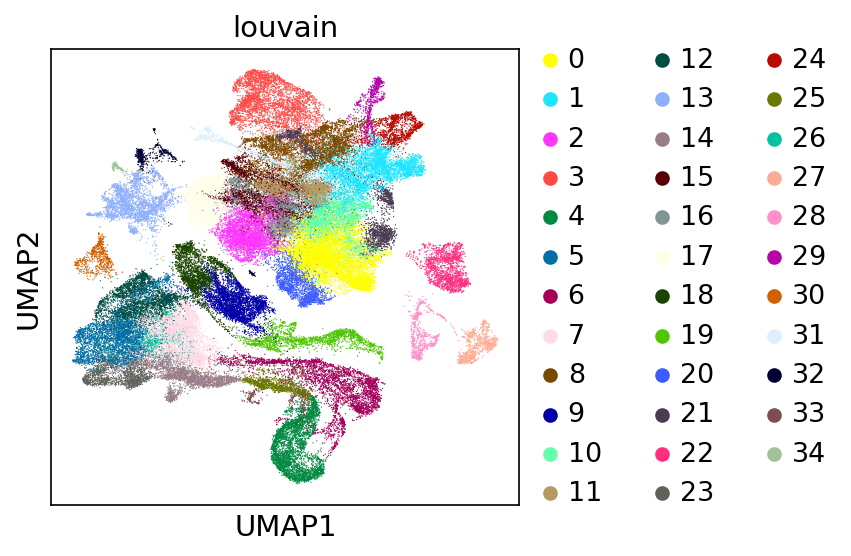

In [22]:
sc.pl.umap(adata, color=['louvain'])
# sc.pl.umap(adata,color='week_stage')

In [23]:
adata.shape

(83827, 26110)

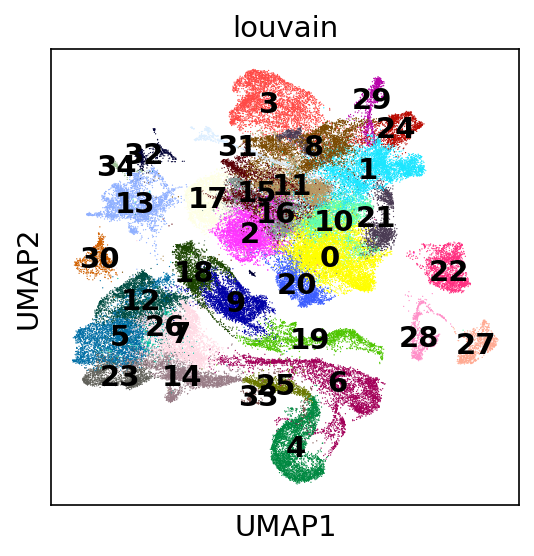

In [24]:
## remove doublet cells
df_doublets = pd.read_csv('/datb/home/wanglab13/PythonScripts/Cell_response/Updates/Data/Doublets_obs.csv')
df_doublets_w3=['-'.join([i.split('-')[0],i.split('-')[1],'0','0']) for i in df_doublets[df_doublets['week_stage']=='W3-1']['index'].values]
df_doublets_w4=['-'.join([i.split('-')[0],i.split('-')[1],'1','0']) for i in df_doublets[df_doublets['week_stage']=='W4-1']['index'].values]
df_doublets_w5=['-'.join([i.split('-')[0],i.split('-')[1],'1']) for i in df_doublets[df_doublets['week_stage']=='W5-1']['index'].values]
df_doublets_w345=df_doublets_w3+df_doublets_w4+df_doublets_w5
adata=adata[~adata.obs_names.isin(df_doublets_w345)]
sc.pl.umap(adata, color=['louvain'],legend_loc='on data')

In [25]:
adata.shape

(81856, 26110)

Trying to set attribute `.obs` of view, copying.


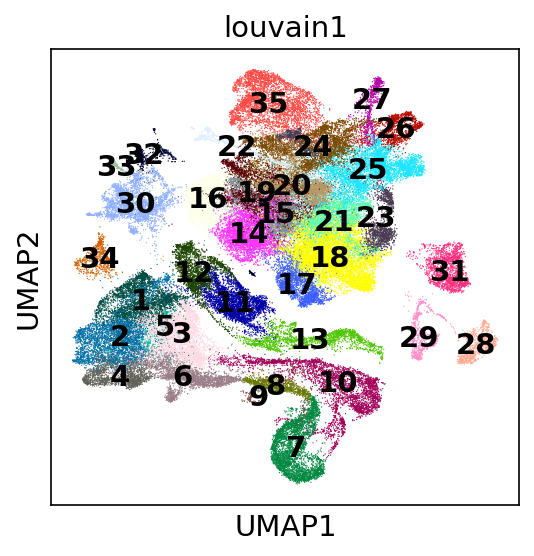

In [26]:
adata.obs['louvain1']=adata.obs['louvain']
new_cluster_names = [
    '18', '25', '14', '35','7','2','10','3','24','11',
    '21','20','1','30','6','19','15','16',
    '12','13','17','23','31','4','26','8','5','28','29','27','34','22','32','9','33']
adata.rename_categories('louvain1', new_cluster_names)
sc.pl.umap(adata,color='louvain1',legend_loc='on data')

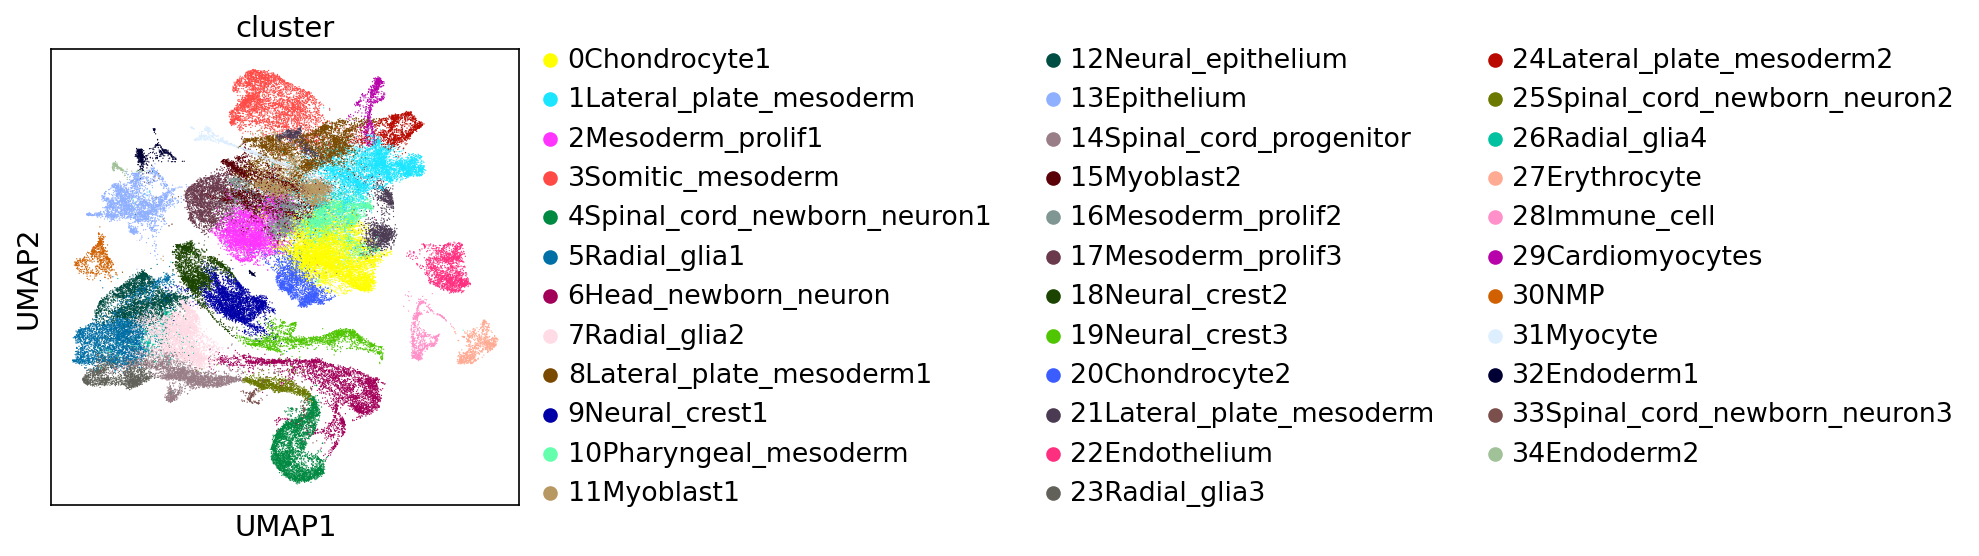

In [27]:
adata.obs['cluster']=adata.obs['louvain']
new_cluster_names = ['0Chondrocyte1','1Lateral_plate_mesoderm','2Mesoderm_prolif1','3Somitic_mesoderm','4Spinal_cord_newborn_neuron1','5Radial_glia1','6Head_newborn_neuron','7Radial_glia2','8Lateral_plate_mesoderm1','9Neural_crest1','10Pharyngeal_mesoderm',
'11Myoblast1','12Neural_epithelium','13Epithelium','14Spinal_cord_progenitor','15Myoblast2','16Mesoderm_prolif2','17Mesoderm_prolif3','18Neural_crest2','19Neural_crest3','20Chondrocyte2','21Lateral_plate_mesoderm','22Endothelium','23Radial_glia3','24Lateral_plate_mesoderm2','25Spinal_cord_newborn_neuron2',
                     '26Radial_glia4','27Erythrocyte','28Immune_cell','29Cardiomyocytes','30NMP','31Myocyte','32Endoderm1','33Spinal_cord_newborn_neuron3','34Endoderm2']
adata.rename_categories('cluster', new_cluster_names)
sc.pl.umap(adata,color='cluster')

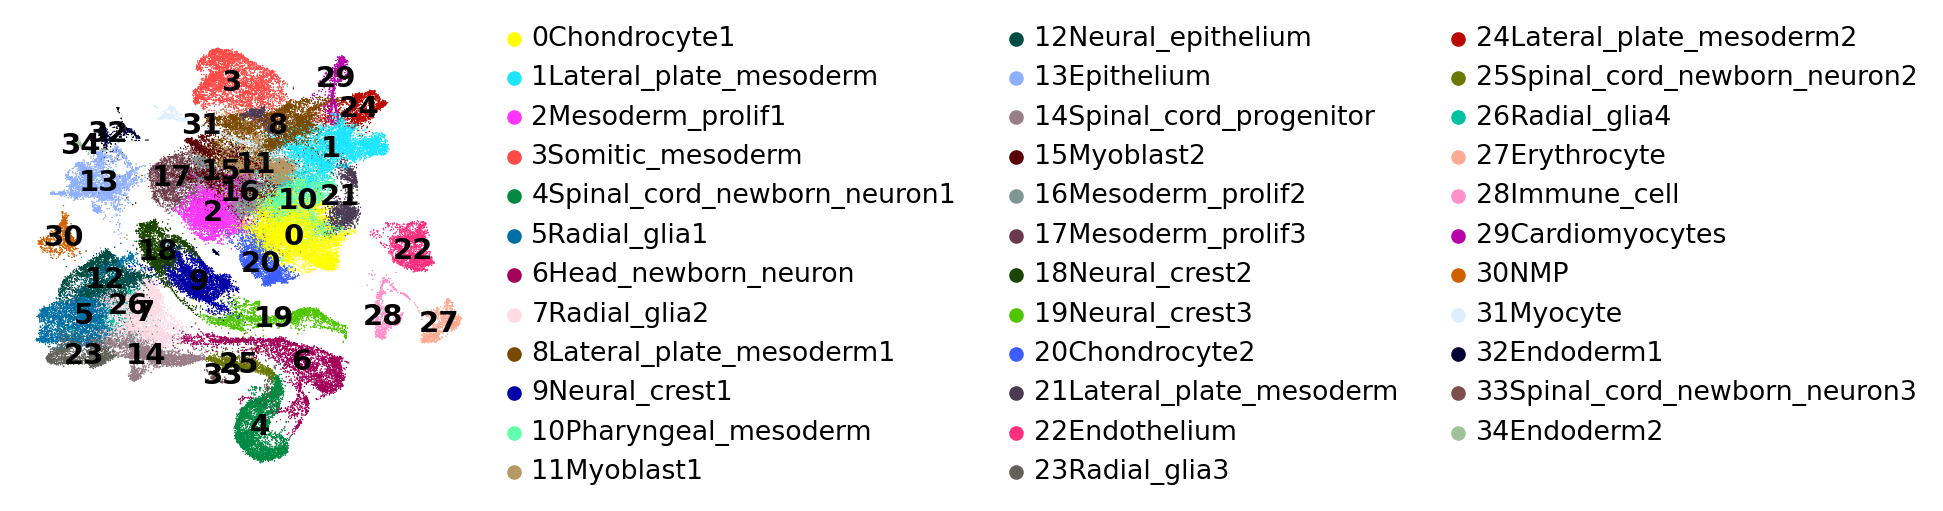

In [28]:
paper_figure_dir="/datb/home/wanglab13/PythonScripts/Paper_figures/paper_figures"
fig, ax = plt.subplots()
ax=sc.pl.umap(adata,color='louvain',legend_loc='on data',frameon=False,title='',ax=ax,show=False)
ax=sc.pl.umap(adata,color='cluster',frameon=False,title='',ax=ax,show=False)
# plt.savefig(os.path.join(paper_figure_dir,"FigS4_umap_v1.pdf"), dpi=300, format='pdf', bbox_inches='tight')
plt.show()   

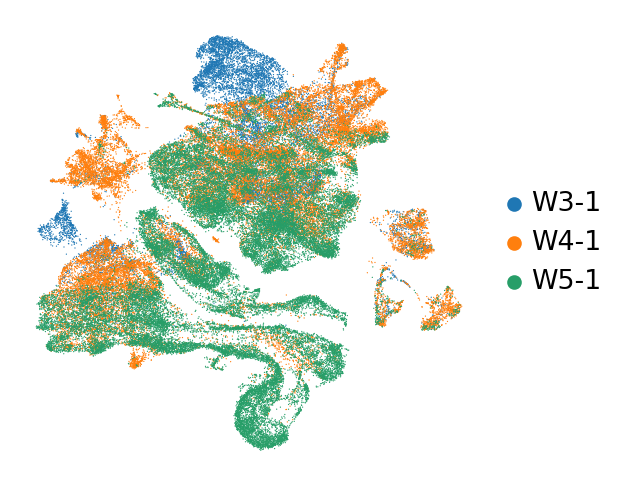

In [29]:
paper_figure_dir="/datb/home/wanglab13/PythonScripts/Paper_figures/paper_figures"
fig, ax = plt.subplots()
ax=sc.pl.umap(adata,color='week_stage',frameon=False,title='',ax=ax,show=False)
# plt.savefig(os.path.join(paper_figure_dir,"FigS4_umap_week_stage.pdf"), dpi=300, format='pdf', bbox_inches='tight')
plt.show()  

In [30]:
import re
obs = adata.obs
louvain_colours = adata.uns['louvain_colors']
stage_colours = adata.uns['week_stage_colors']

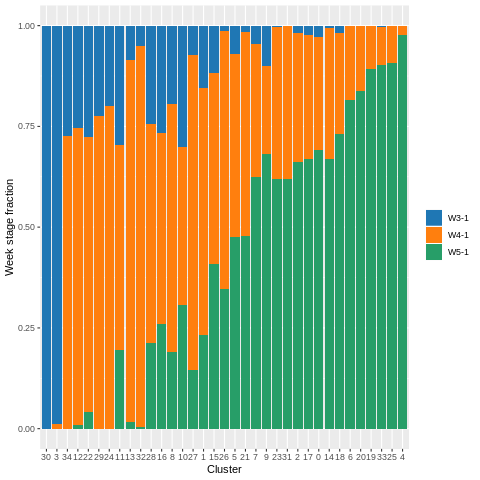

In [43]:
%%R -i stage_colours -i obs
library(reshape2)
meta = obs
colnames(meta)[which(names(meta) == "week_stage")] <- "stage"
names(stage_colours) = as.character(unique(meta$stage)[order(unique(meta$stage))])
stage_labs = names(stage_colours)
names(stage_labs) = names(stage_colours)
known_meta = meta
contrib_known = table(known_meta$louvain, known_meta$stage)/rowSums(table(known_meta$louvain, known_meta$stage))
mean_stage = apply(contrib_known, 1, function(x) sum(x * c(6.25,6.50, 6.75)))
pdf1 = melt(contrib_known)
names(pdf1) = c("cluster", "stage", "fraction")
ggplot(pdf1, aes(x = factor(cluster, ordered = TRUE, levels = names(mean_stage)[order(mean_stage)]), y= fraction, fill = stage)) +
  geom_bar(stat = "identity") +
  scale_fill_manual(values = stage_colours, labels = names(stage_labs), name = "") +
  labs(x = "Cluster", y= "Week stage fraction")

In [31]:
marker18=['PAX9','LECT1']
marker25 = ['FOXF1','TCF21','COLEC11']
marker14=['MEOX2']
marker35=['CDX4']
marker7=['ISL1','ELAVL4','STMN2']
marker2=['PAX6','NPPC']
marker21=['LHX1','CRABP1']
marker3=['ARL4A','WNT7B']
marker24=['BMP4']
marker20=['SOX10','PLP1','MPZ']
marker10=['MECOM','TBX1']
marker11=['PAX3','MEOX1','TCF15']
marker1=['POU3F1','OTX2','SIX3']
marker30=['EPCAM','CLDN4']
marker6=['SOX3','FGFBP3']
marker19=['CEP70']
marker15=['PRRX2']
marker16=['TOP2A','CCNB1']
marker12=['FOXD3']
marker13=['NEUROD1','NEUROG1','POU4F1']
marker17=['LUM','ZIC1']
marker23=['PAX8','WT1']
marker31=['KDR','CDH5']
marker4=['POU3F2','HES5']
marker26=['HAND1','PITX2']
marker8=['HES6','NEUROD4','OLIG1']
marker5=[]
marker28=['HBZ','GYPA']
marker29=['CTSS','C1QC']
marker27=['MYH6','NKX2-5']
marker34=['CDX2','HOXA7']
marker22=['IGF2','MYF6','MYOG']
marker32=['TTR','FOXA3']
marker9=['DCX']
marker33=['SHH','FN1']

markers = marker1+marker2+marker3+marker4+marker5+marker6+marker7+marker8+marker9+marker10+marker11+marker12+marker13+marker14+marker15+marker16+\
marker17+marker18+marker19+marker20+marker21+marker22+marker23+marker24+marker25+marker26+marker27+marker28+marker29+marker30+marker31+marker32+marker33+marker34+marker35


In [33]:
adata.obs['louvain1']=adata.obs['louvain']
new_cluster_names = [
    '18', '25', '14', '35','7','2','21','3','24','20',
    '10','11','1','30','6','19','15','16',
    '12','13','17','23','31','4','26','8','5','28','29','27','34','22','32','9','33']
adata.rename_categories('louvain1', new_cluster_names)
adata.obs['louvain1'].cat.reorder_categories(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35'],inplace=True)

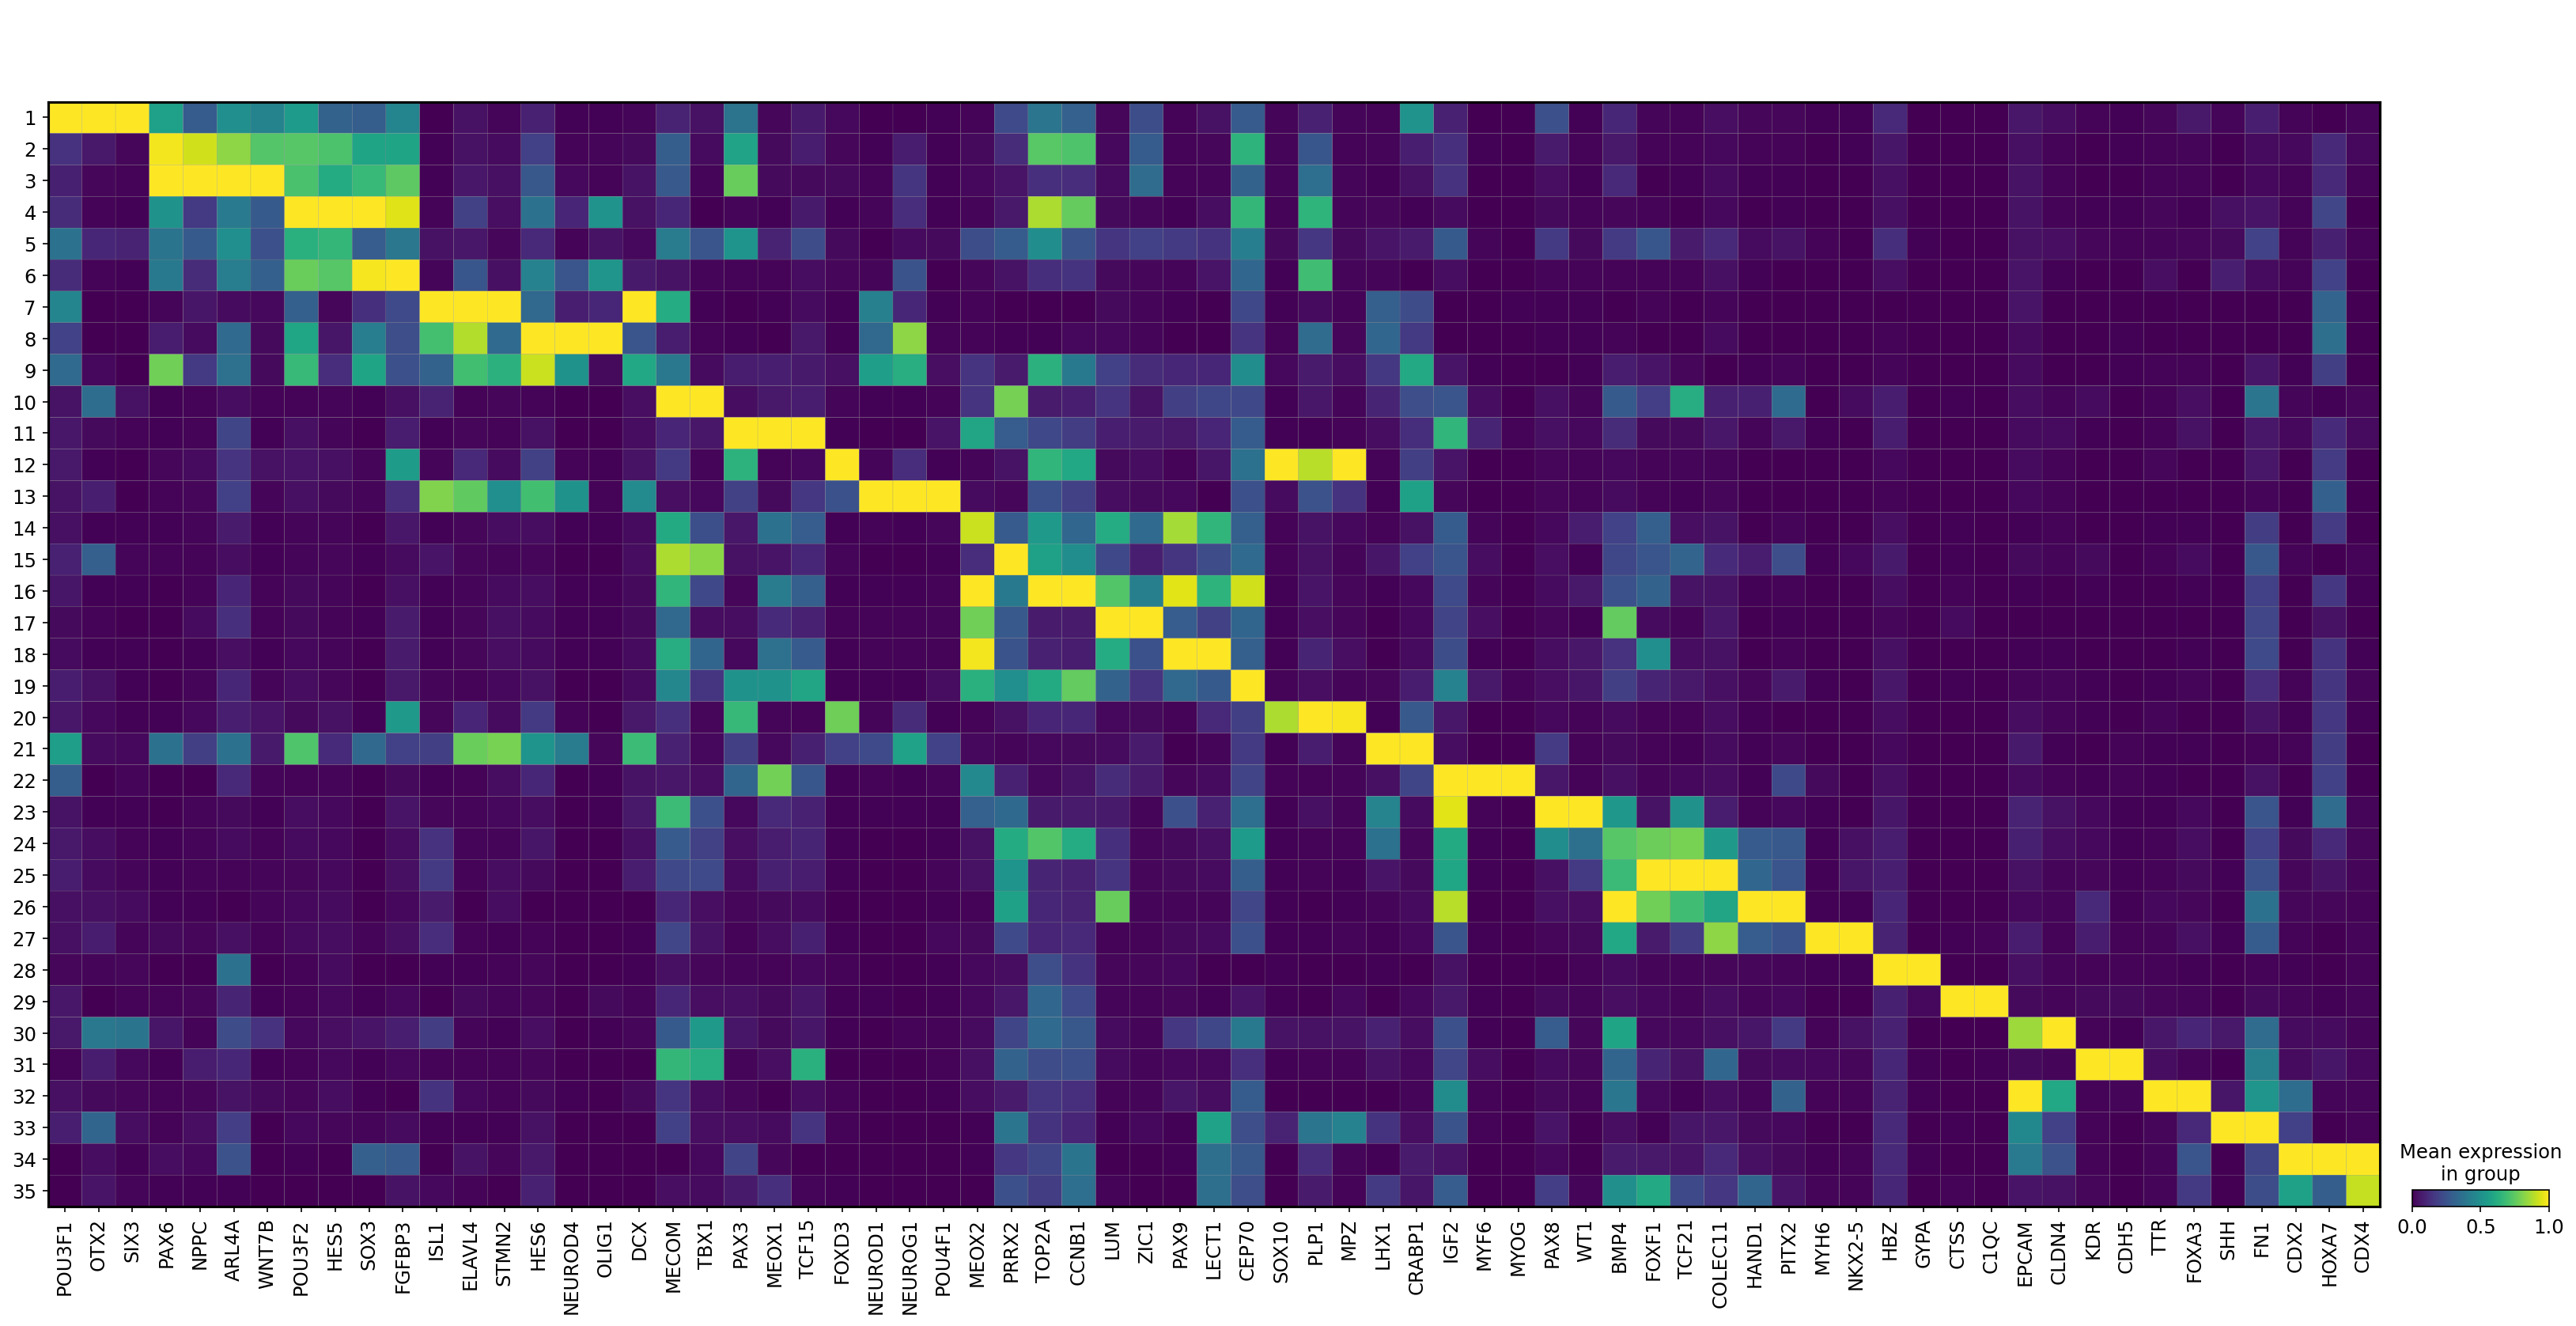

In [34]:
axs = sc.pl.matrixplot(adata, markers,groupby='louvain1', standard_scale='var',dendrogram=False,show=False,cmap='viridis', linewidths=0)
# plt.savefig("/datb/home/wanglab13/PythonScripts/Paper_figures/paper_figures/Figs4_marker_genes_heatmap_v3.pdf", dpi=300, format='pdf', bbox_inches='tight')

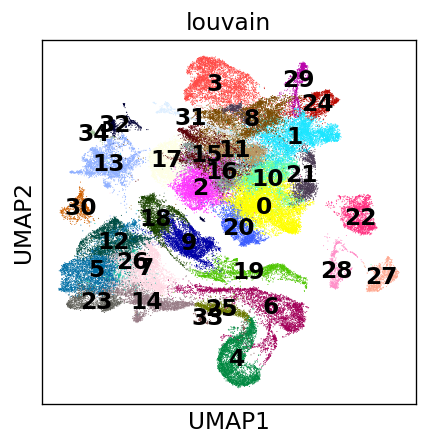

In [39]:
sc.settings.set_figure_params(dpi=120)
sc.pl.umap(adata,color='louvain',legend_loc='on data')

In [53]:
map_coarse = {}
for c in adata.obs['louvain'].cat.categories:
    if c in ['12','5','23','26','7','23','14','25','33','4','6']:
        map_coarse[c]='CNS Lineage'
    if c in ['9','18','19']:
        map_coarse[c]='PNS Lineage'
    if c in ['30']:
        map_coarse[c]='NMP'
    if c in ['13']:
        map_coarse[c]='Epithelium Lineage'
    if c in ['32','34']:
        map_coarse[c]='Endoderm Lineage'
    if c in ['3']:
        map_coarse[c]='Mesoderm Precursor'
    if c in ['8','1','24']:
        map_coarse[c]='Lateral Plate Mesoderm Lineage'
    if c in ['29']:
        map_coarse[c]='Cardiomyocyte'
    if c in ['11','15','31','16','10']:
        map_coarse[c]='Dermamyotome Lineage'
    if c in ['17','2','20','0']:
        map_coarse[c]='Sclerotome Lineage'
    if c in ['21']:
        map_coarse[c]='Intermediate Mesoderm Llineage'
    if c in ['22']:
        map_coarse[c]='Endothelium Lineage'
    if c in ['28']:
        map_coarse[c]='Immune Lineage'
    if c in ['27']:
        map_coarse[c]='Primitive Erythroid Lineage'
adata.obs['louvain_lineage']=adata.obs['louvain']
adata.obs.replace({'louvain_lineage':map_coarse},inplace=True)

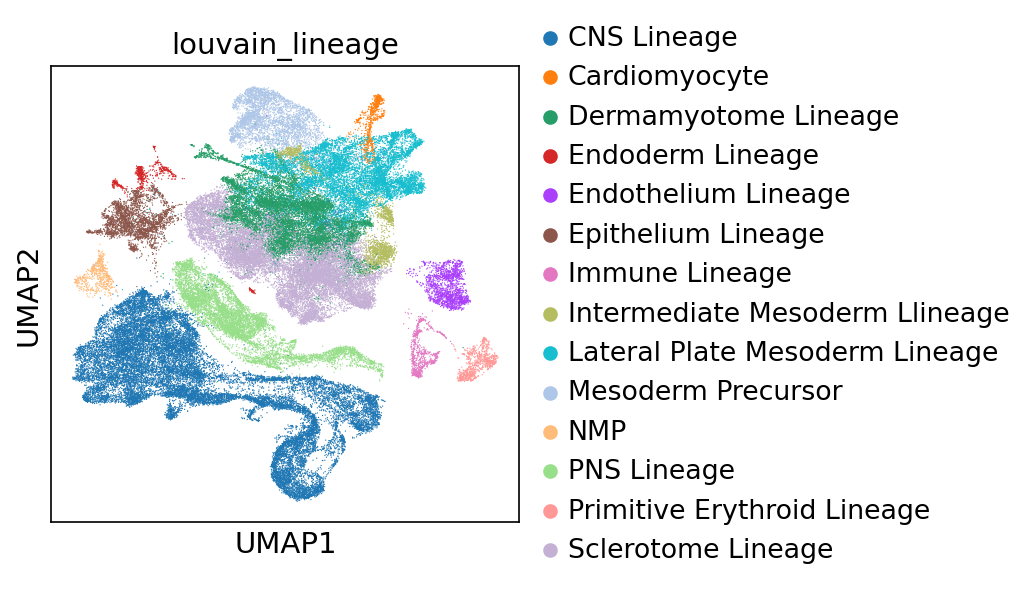

In [56]:
sc.settings.set_figure_params(dpi=150)
sc.pl.umap(adata,color='louvain_lineage',legend_loc='right margin')

In [57]:
Dermamyotome_lineage  = ['SIX1','PAX3','MYF6']
Sclerotome_lineage  = ['PAX1','SOX9','ZIC1']
Lateral_plate_mesoderm_lineage    = ['HAND1','COL6A2',"BMP4"]
Intermediate_mesod_lineage   = ['PAX8','OSR2','NTRK2']
CNS_lineage   = ['SOX2','POU3F2','PAX6']
PNS_lineage    = ['TFAP2B','SOX10','MPZ']
NMP   = ['CDX2','MIXL1','FGF8']
Mesoderm_precursor  =['CDX4','TBX6','CITED1']
Endoderm_lineage   = ['APOA2','FOXA1','TTR']
Epithelium_lineage    = ['EPCAM','CLDN4','CDH3']
Primitive_erythroid_lineage   = ['HBM','GYPB','AHSP']
Cardiomyocyte    = ['NKX2-5','MYL3','TNNT2']
Endothelium_lineage   = ['CDH5','KDR','SOX7']
Immune_lineage = ['C1QA','ITGB2','CYBB']
markers=Dermamyotome_lineage+Sclerotome_lineage+Lateral_plate_mesoderm_lineage+ Intermediate_mesod_lineage+\
CNS_lineage+PNS_lineage+ NMP+Mesoderm_precursor+Endoderm_lineage+Epithelium_lineage +Primitive_erythroid_lineage+\
Cardiomyocyte+ Endothelium_lineage+Immune_lineage

In [59]:
adata.obs['louvain_lineage'].cat.reorder_categories(['Dermamyotome Lineage', 'Sclerotome Lineage','Lateral Plate Mesoderm Lineage', 'Intermediate Mesoderm Llineage',
'CNS Lineage','PNS Lineage','NMP', 'Mesoderm Precursor','Endoderm Lineage', 'Epithelium Lineage', 'Primitive Erythroid Lineage',
'Cardiomyocyte', 'Endothelium Lineage', 'Immune Lineage'],inplace=True)

{'mainplot_ax': <AxesSubplot:>,
 'size_legend_ax': <AxesSubplot:title={'center':'Fraction of cells\nin group (%)'}>,
 'color_legend_ax': <AxesSubplot:title={'center':'Mean expression\nin group'}>}

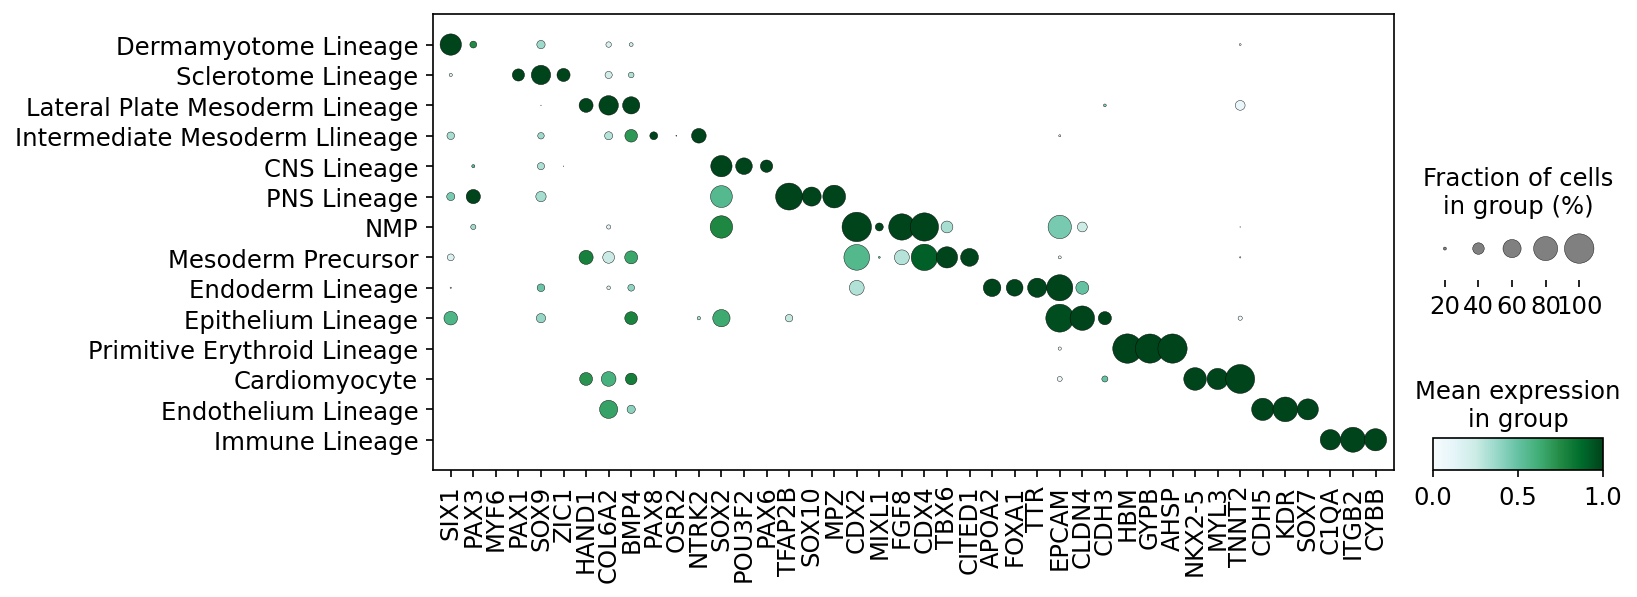

In [60]:
fig,ax=plt.subplots(figsize=(10,4))
sc.pl.dotplot(adata,markers,log=False, groupby='louvain_lineage',standard_scale='var',cmap='BuGn', linewidths=0,ax=ax,show=False,use_raw=False,dot_min=0.16,figsize=(10,4))
# plt.savefig('/datb/home/wanglab13/PythonScripts/Paper_figures/paper_figures/Fig3/Fig3_lineage_dotplot.pdf',dpi=300, format='pdf')

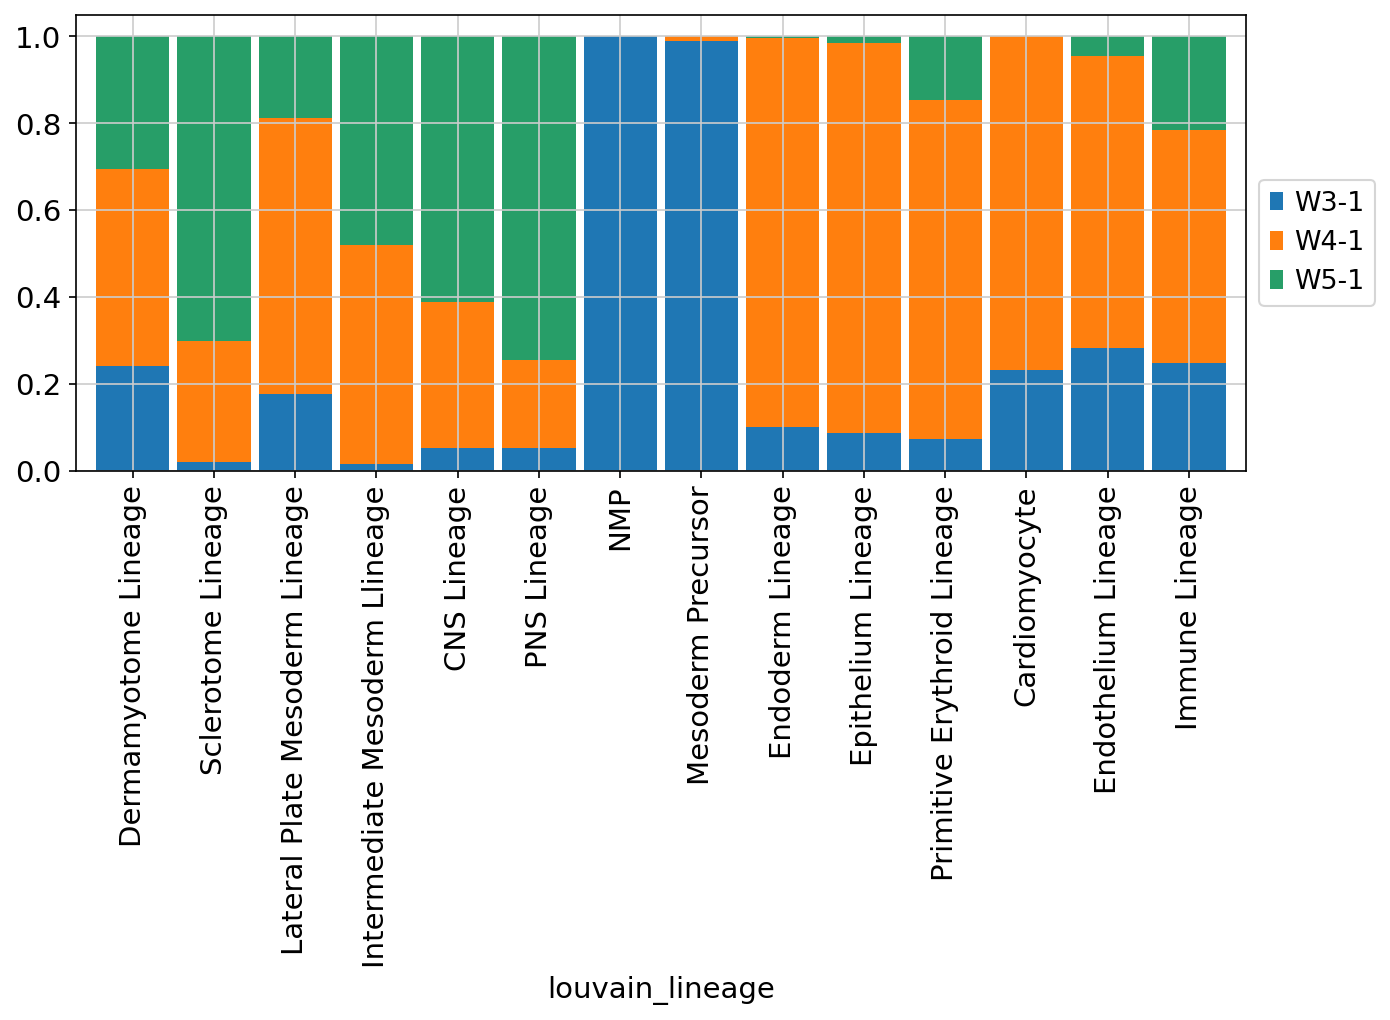

In [63]:
df=pd.crosstab(adata.obs.week_stage,adata.obs.louvain_lineage).T
df=df.div(df.sum(axis=1), axis=0)
ax=df.plot.bar(stacked=True,figsize=(10,4),width=0.9)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5)) #here is the magic
# plt.savefig('/datb/home/wanglab13/PythonScripts/Paper_figures//paper_figures/Fig3/Fig3_lineage_fraction.pdf',dpi=300, format='pdf')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_louvain_lineage']`


<AxesSubplot:>

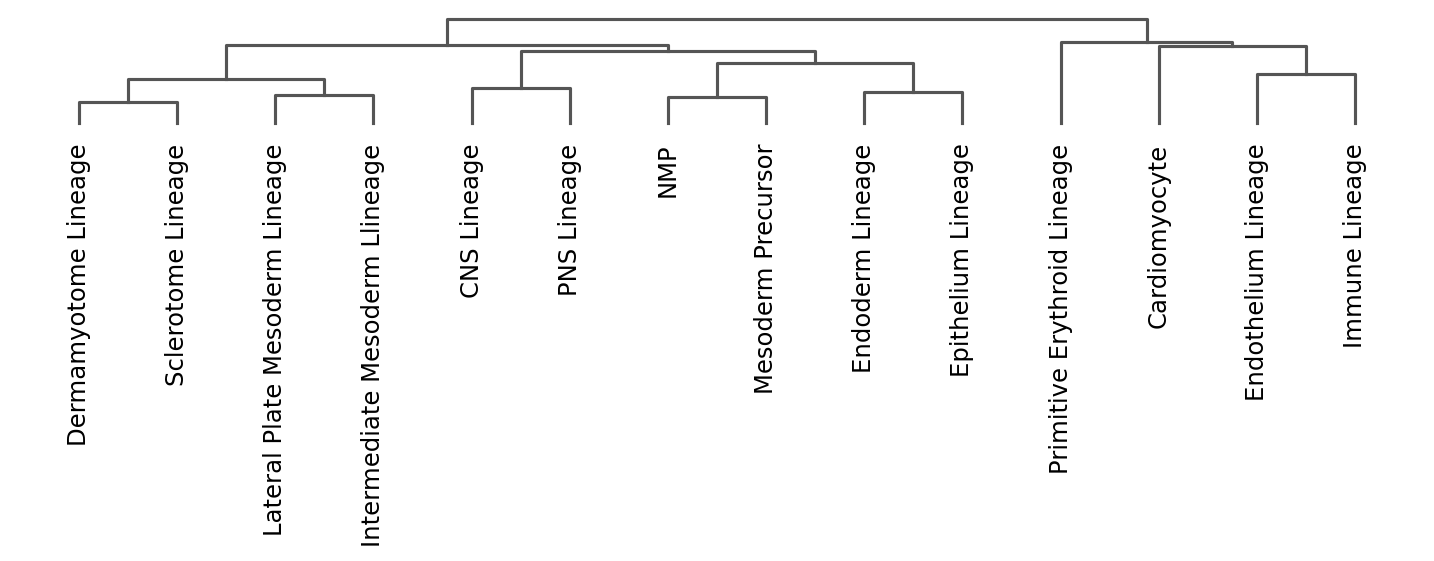

In [65]:
fig,ax=plt.subplots(figsize=(12,1))
sc.pl.dendrogram(adata,groupby='louvain_lineage',show=False,ax=ax)
# plt.savefig('/datb/home/wanglab13/PythonScripts/Paper_figures/paper_figures/Fig3/Fig3_RG_lineage_dendrogram.pdf',dpi=300, format='pdf')

In [66]:
adata.write('./Data/w345_v3.h5ad')